# Continuous Distribution

### PDF : Probability Density Function

<img style="float:right;" src="imgs/c12_prob_pdf.png" />

Probability per something, 每單位的密度。

Def: r.v. X has PDF $ f(x) $ if  

$$
P \big( a \le X \le b \big) = 
\int_a^b f(x) \ dx \text{ , for all a, b }
$$

Note : $ P \big( a \le X \le a \big) = \int_a^a f(x) \ dx = 0 $

### To be valid PDF

$$
f(x) \ge 0 \ , \ \int_{-\infty}^{\infty} f(x) \ dx = 1 
$$

sum of area under curve is 1.

for $ \epsilon \gt 0$, very small,

$$
f \big(x_0\big) \times \epsilon \approx P \Big( X \in ( x_0 - \frac{\epsilon}{2}, x_0 + \frac{\epsilon}{2} ) \Big)
$$

### CDF : Cumulative Distribution Function

If X has PDF: f, the CDF is :
$$ 
F(x) = P \big( X \le x \big) 
= \int_{-\infty}^{x} \underbrace{f(t)}_{PDF} \ dt 
$$

If X has CDF F and X is a continuous r.v. ,  
then $ f(x) = F'(x) $ by FTC (Fundamental Theorem of Calculus).

$$
P \big( a \le X \le b \big) =
\int_a^b f(x) \ dx = 
F(b) - F(a) \text{ , by FTC.}
$$

## Comparison of Concrete and Continuous Distribution

| . . . . . . . . . .Distribution. . . . . . . . . . | . . . . . . . . . .Concrete. . . . . . . . . . | . . . . . . . . . .Continuous. . . . . . . . . . |
| - | - | - |
| Random Variable | $ X $ | $ X $ |
|   | PMF : $ P\big(X=x\big) $ | PDF : $ f_X \big( x \big) = F'_X \big( x \big) $ |
| CDF | $ F_X \big( x \big) = P \big( X \le x \big) $ | the same |
| Expected Value | $ E \big(X\big) = \sum_x x \ P(X=x) $ | $ E \big(X\big) = \int_{-\infty}^{\infty} x \ f_X(x) dx $ |
| Variation | $ Var\big(X\big) = E(X^2) - (EX)^2  $ | the same |

## Variance

$$
Var(X) = E \big( X - EX \big)^2
$$

Var 的計量是 "單位平方"，不好解釋；  
於是開根號後得 Standard Deviation，為同樣單位的計量，方便解釋: 

$$
SD\big( X \big) = \sqrt{ Var \big( X \big) } 
$$

Var 也可以用另一種較容易獲得的計算方式:

$$
\begin{align}
Var(X) & = E \big( X - EX \big)^2 \\
& = E \Big( X^2 - 2 \ X \ (\underbrace{EX}_{\text{constant}}) + (\underbrace{EX}_{\text{constant}})^2 \Big) \\
& = E ( X^2 )  - 2 \ (EX) \ (EX) + (EX)^2 \\
& = E ( X^2 ) - (EX)^2
\end{align}
$$

Notation: $ EX^2 = E\big(X^2\big) $

---

# Uniform Distribution: $ Unif(a,b) $

```
|------------|------|
a            x      b
```

pick a random point in [a,b].  
如果將 interval [a,b] 分一半，"random" 表示 x 落在 各半 的機會相同；  
以此推論，機率與 [a,b] 的長度成正比。

Unif : Probability $ \propto $ length.

### PDF

$$
f(x) = \begin{cases}
c, \text{ if } a \le x \le b \\
0, \text{ otherwise }
\end{cases}
$$

$$
1 = \int_a^b c \ dx \to \frac{1}{b-a} = c
$$

### CDF

$$
F(x) = \int_{-\infty}^x f(t) \ dt \\
= \int_a^x f(t) \ dt = \begin{cases}
0, & \text{ if } x \lt a \\
\frac{x-a}{b-a}, & \text{ if } a \le x \le b, \ \ f(t) \text{ is constant c.} \\
1, & \text{ if } x \gt b \\
\end{cases}
$$

### EX

$$
E(X) = \int_a^b x \times f(x) \ dx \\
= \frac{1}{b-a} \times \frac{1}{2} x^2 \Bigg|^b_a \\
= \frac{a+b}{2}
$$

### VAR

$
\text{Let } U \sim Unif(0,1) \\
E(U) = \frac{1}{2} \\
E(U^2) = \int_0^1 u^2 \underbrace{f_U(u)}_{\text{constant c}} \ du = \frac{1}{3} u^3 \Bigg|^1_0 = \frac{1}{3} \\
\\
Var(U) = E(U^2) - (EU)^2 = \frac{1}{3} - (\frac{1}{2})^2 = \frac{1}{12}
$

---

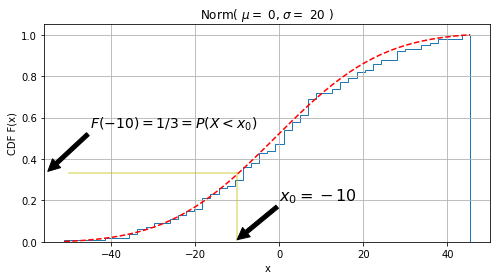

In [2]:
# Graph for Universality of Uniform

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

np.random.seed(0)
mu, sigma, n_bins = 0, 20, 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True)
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, color='r')
ax.grid(True)
ax.set_title(r'Norm( $\mu = $ %d, $\sigma = $ %d )' % (mu, sigma))
ax.set_xlabel('x')
ax.set_ylabel('CDF F(x)')
ax.plot([-50, -10], [.333, .333], 'k-', color='y', alpha=.5)
ax.plot([-10, -10], [.333, .01], 'k-', color='y', alpha=.5)
ax.annotate(r'$ F(-10) = 1/3 = P(X < x_0) $', xy=(-55, .34), fontsize=14,
            xytext=(-45, .55), arrowprops=dict(facecolor='black'))
ax.annotate(r'$ x_0 = -10 $', xy=(-10, .01), fontsize=16,
            xytext=( 0, .2), arrowprops=dict(facecolor='black'))

plt.show()

### Universality of Uniform

$$
F(x_0) = \frac{1}{3} \\
= P \Big( F(x) \le \frac{1}{3} \Big) \\
= P \Big( X \le x_0 \Big) \\
\\
F \big( X \big) \sim Unif(0,1)
$$

### Example of Logistic Distribution

$$
F(x) = \frac{e^x}{1 + e^x}
$$

this F(x) increasing to 1, is a valid CDF.

How to simulate samples? Consider:

$$
U \sim Unif(0,1) \\
F^{-1} (u) = \log \frac{u}{1-u}
$$

將 Unif 產生的 sample 放入 $ F^{-1}(u) $，就是 samples of Logis Distribution.


## Uniform is Universal

From Uniform, can get any distribution.

Given Uniform, can create any distribution you want.

Let $ U \sim Unif(0,1) $, 如果有一已知的 CDF: F, 但不知道其對應的 r.v. : X  
F be a CDF ( assume F is strictly increasing, continuous function )

任何函數 $ x \to -\infty $ 時為 0, $ x \to \infty $ 時為 1, 就是 valid CDF

Theorem: Let $ X = F^{-1}(u), \ then \ \ , X \sim F $

Proof:

$$
P \big( X \le x \big) = P \big( F^{-1}(u) \le x \big) \\
= P \big( u \le F(x) \big) = F(x)
$$

Also:

$$
\text{if } X \sim F, \text{ then } F(X) \sim Unif(0,1)
$$

### Example

$$
F(x) = 1 - e^{-x}, x \gt 0
$$

simulate:

$$
X \sim F \\
F^{-1}(u) = - \ln(1-u) \sim F
$$

代表由 Unif random 產生 10 樣本，套入 $ - \ln(1-u) $，即可得到由 Expo(1) 分佈的 10 random 樣本。

計算:

$$
F(x) = 1 - e^{-x} = y \\
1 - y = e^{-x} \\
\ln(1 - y) = \ln( e^{-x} ) = -x \\
x = -\ln( 1 - y ) = F^{-1}
$$

### Symmetry of Uniform

$$
U \sim Unif(0,1) \to \ \ 1 - U \sim Unif(0,1)
$$

```

|------------------|-------------|
0 <----- u ------> u <-- 1-u --> 1

```

$ a + b U $ is also uniform between some interval.

## Indep. of r.v.s $ X_1, X_2, \cdots, X_n $

#### Joint CDF

Def. $ X_1, X_2, \cdots, X_n $ are independent if:

$
\underbrace{P \big( X_1 \le x_1, X_2 \le x_2, \cdots, X_n \le x_n \big)}_{\text{joint CDF}} \\
= P \big( X_1 \le x_1 \big) \times \cdots \times P \big( X_n \le x_n \big)
$

, for all $ x_1, x_2, \cdots, x_n $

for discrete case:

#### Joint PMF

$
P \big( X_1 = x_1, X_2 = x_2, \cdots, X_n = x_n \big) \\
= P \big( X_1 = x_1 \big) \times \cdots \times P \big( X_n = x_n \big)
$

### Pairwise indep.

$ X_1, X_2 \sim Bern(\frac{1}{2}) $ , 翻硬幣事件。

$
X_3 = \begin{cases}
1, if x_1 = x_2 \\
0, otherwise
\end{cases}
$

$ X_3 $ 是 indicator r.v.  
這三個 r.v 是 pairwise indep., but not indep.